In [25]:
from polymer_gc.data.database import SessionManager
from polymer_gc.graph.maker import LinearRandomCopolymer,PolymerMaker
from polymer_gc.graph.maker import ReusableGraphEntry
lin_monomers=["*CC*","*C(CC)C*"]
with SessionManager("database.db") as session:
    lin_rand_maker = LinearRandomCopolymer(lin_monomers=lin_monomers,min_mass=1_000,max_mass=3_000,max_pdi=1.2)
    polymers = lin_rand_maker(n_polymers=10,graphs_per_polymer=21)



In [26]:
with SessionManager("database.db") as session:
    display(polymers[0])
    display(polymers[0].structrures)

DatasetItem(id=1, entry_type='linear_random_copolymer', mw=3435.0, structure_map={'A': 1, 'B': 2}, dataset_id=1, targets={'hot_encoded_architecture': 0, 'hot_encoded_structure': 1}, mn=2874.0, sec_id=1, params={'n_monomers': 2, 'monomer_ratios': [0.3, 0.7], 'reactivity_ratios': [1.0, 1.0]})

{'A': SQLStructureModel(smiles='*C(CC)C*', name=None, id=1, mass=56.108),
 'B': SQLStructureModel(smiles='*CC*', name=None, id=2, mass=28.053999999999995)}

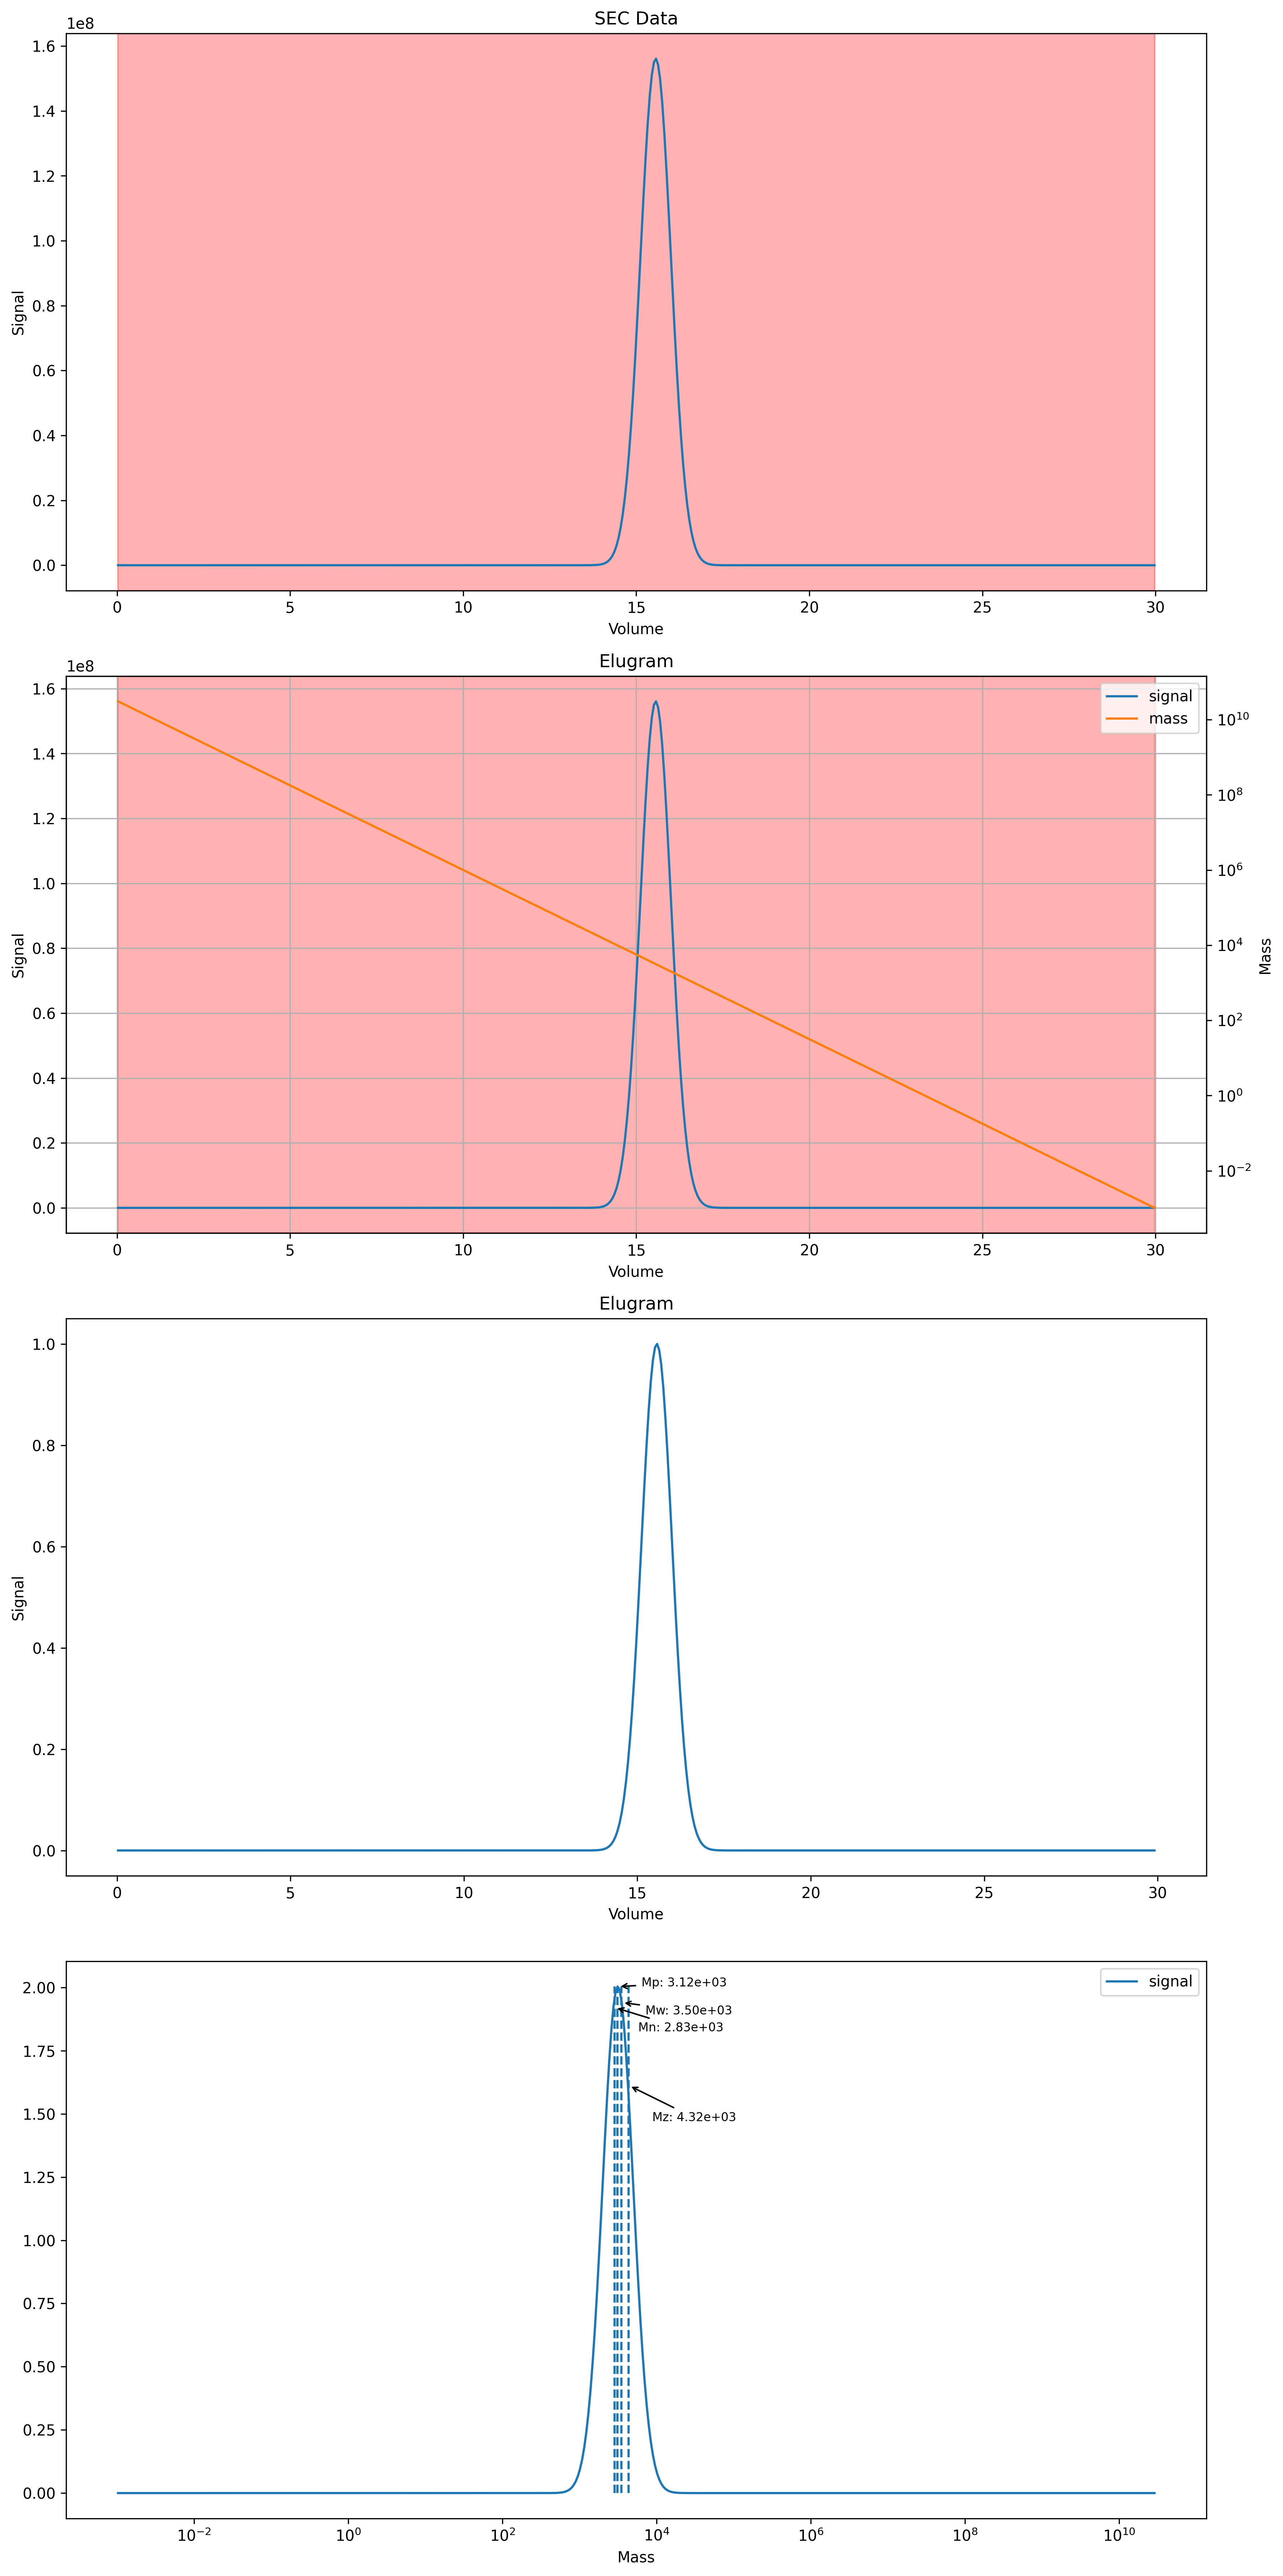

In [27]:
with SessionManager("database.db") as session:
    sec_entry = polymers[0].sec
simsec=sec_entry.sec
fig,axes=simsec.plot()


In [28]:
for n, mass_idx, c in zip(
            *np.unique(n_nodes, return_counts=True, return_index=True)
        ):
        print(n,mass_idx,c)
        requ = dict(
                n_nodes_min=max(int(n * 1 / lin_rand_maker.allowed_node_deviation), 1),
                n_nodes_max=int(n * lin_rand_maker.allowed_node_deviation),
                name=lin_rand_maker.graph_name,
                description=lin_rand_maker._formatted_graph_description(polymers[0]),
                # n=c,
            )
        print(requ)
        with SessionManager("database.db") as session:
            ge=ReusableGraphEntry.get_possible_entries(**requ)
            print(len(ge),[len(g.to_nx()) for g in ge[:10]])
            display(ge[0])


NameError: name 'n_nodes' is not defined

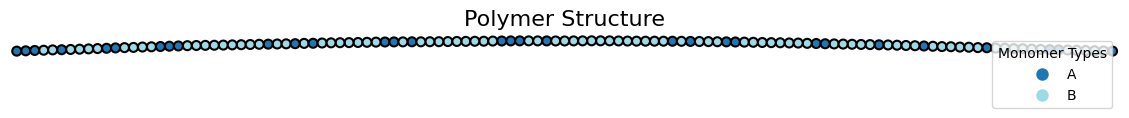

In [31]:
from polymcsim import (
    MonomerDef,
    ReactionSchema,
    SimParams,
    SimulationInput,
    Simulation,
    visualize_polymer,
    SiteDef,
)

with SessionManager("database.db") as session:
    graphs = polymers[0].graphs
    structures = polymers[0].structrures

visualize_polymer(graphs[0].to_nx())

